In [ ]:
#section 2  ------------> number of tweets
import os
import tweepy as tw
import pandas as pd
import csv
access_key = "3402453519-EuapUpj2uRl11sdCikkXvSibSMqmNgPUh4euf0Y"
access_secret = "WcQHcRU0wa2wniT9EpB8HD3mBjpkOwNh5uYEqsAt4DTlt"
consumer_key = "Ibf4U3tahEkoc5C4VOmLL3IeI"
consumer_secret = "9qXJsfSHZDFpZtxhOz5Ku2IoLoJZwpamQVLejYjpkQJN5OFxp7"
auth = tw.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_key,set_access_token)
api = tw.API(auth, wait_on_rate_limit=True)
search_words = "#RahulDravid"
date_since = "2021-03-16"
csvFile1 = open('tweet1.csv', 'a')
csvWriter1 = csv.writer(csvFile1)
tweets = tw.Cursor(api.search,q=search_words,lang="en",since=date_since).items(1500)  #data collected for arnab Goswami
tweet=[]
for i in tweets:
  csvWriter1.writerow([i.created_at,i.id,i.text,i.favorite_count,i.retweet_count,i.id_reply])
  tweet.append(i.text)
print(len(tweet))
csvFile1.close()

632


Text(0.5, 1.0, 'most occuring #tags')

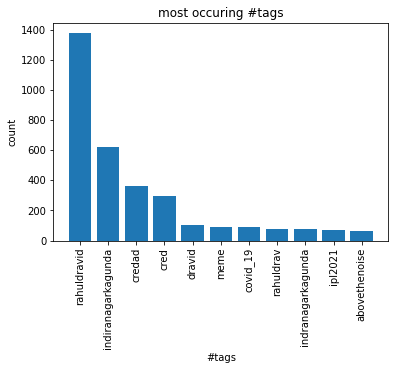

In [ ]:
import re                       #top 10 hashtags extracted
import nltk
import pandas as pd
import matplotlib.pyplot as plt


dt=pd.read_csv('tweet1.csv')
dt=pd.DataFrame(dt)
dt.columns=['time','id','text','like','retweet']
hashtags=[]
for i in list(dt['text']):
  x=str(i).lower()
  htag=re.findall(r"#(\w+)", x)
  for j in htag:
    hashtags.append(j)
htagf=nltk.FreqDist(hashtags)
df=pd.DataFrame(htagf.keys(),htagf.values()).reset_index()
df.columns=['count','tag']
dff=df.sort_values(by=['count'],ascending=False)
c=list(dff['count'])
t=list(dff['tag'])
top10k=[]
top10v=[]
for i in range(11):
  top10k.append(t[i])
  top10v.append(c[i])
plt.bar(top10k,top10v)
plt.xticks(rotation=90)
plt.xlabel('#tags')
plt.ylabel('count')
plt.title('most occuring #tags')

In [ ]:
#collecting the final tweets   ----> all tweets
import csv
import tweepy as tw

finaltweets=[]
for i in top10k:
  search_words = "#"+i
  date_since = "2021-02-16"
  csvFile2 = open('tweet2.csv', 'a')
  csvWriter2 = csv.writer(csvFile2)   
  tweetss = tw.Cursor(api.search,q=search_words,lang="en",since=date_since).items(600)
  for j in tweetss:
    csvWriter2.writerow([j.created_at,j.id,j.text,j.favorite_count,j.retweet_count])
    finaltweets.append(j.text)
csvFile2.close()
print("done")

Text(0.5, 1.0, 'most liked #tags ')

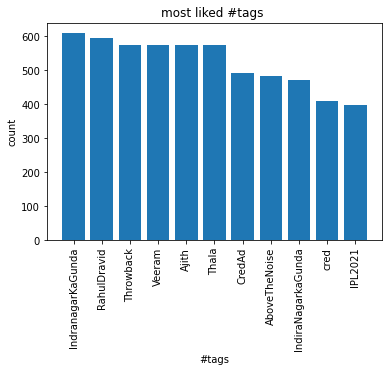

In [ ]:
import nltk
import pandas as pd     #-----------------> most occuring #
import matplotlib.pyplot as plt

dts=pd.read_csv('tweet2.csv')
dts=pd.DataFrame(dts)
dts.columns=['time','id','text','like','retweet']
allh=[]
for i in list(dts['text']):
  htags=re.findall(r"#(\w+)", i)
  for j in htags:
    allh.append(j)
fhh=nltk.FreqDist(allh)
kk=list(fhh.keys())
vv=list(fhh.values())
d=pd.DataFrame(kk,vv).reset_index()
d.columns=['c','h']
dd=d.sort_values(by=['c'],ascending=False)
topv=list(dd['c'])
topk=list(dd['h'])
mostoccurk=[]
mostoccurv=[]
for i in range(0,11):
  mostoccurk.append(topk[i])
  mostoccurv.append(topv[i])
plt.bar(mostoccurk,mostoccurv)
plt.xticks(rotation=90)
plt.xlabel('#tags')
plt.ylabel('count')
plt.title('most liked #tags ')

Text(0.5, 1.0, '#tags vs retweets')

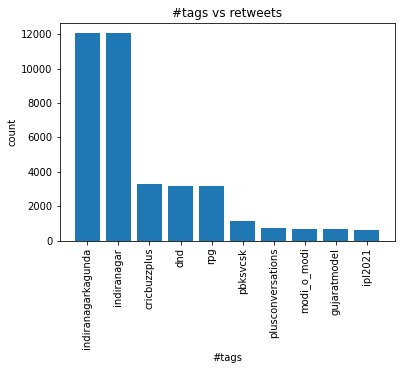

In [ ]:
liked=pd.read_csv('tweet2.csv')   #----------------> most liked hashtags #
ldata=pd.DataFrame(liked)
ldata.columns=['date','id','text','like','re']
lldata=ldata.sort_values(by=['like'],ascending=False)
ltext=list(lldata['text'])
likes=list(lldata['like'])
mostliked=[]
count=[]
for i in range(0,20):
  htags=re.findall(r"#(\w+)", str(ltext[i]).lower())
  for j in htags:
    if(j not in mostliked):
      mostliked.append(j)
      mostliked.append(likes[i])
k=[]
v=[]
for i in range(0,len(mostliked),2):
  k.append(mostliked[i])
for i in range(1,len(mostliked),2):
  v.append(mostliked[i])
f=[]
ff=[]
for i in range(0,10):
  f.append(k[i])
  ff.append(v[i])
for i in range(len(ff)):
  ff[i]=ff[i]*10
plt.bar(f,ff)
plt.xticks(rotation=90)
plt.xlabel('#tags')
plt.ylabel('count')
plt.title('#tags vs retweets')